# SYSC4906 Introduction to Machine Learning
## Assignment 1
|**Student name** | **Student number**|
|-----------------|-------------------|
| Arushan Sinnadurai | 101039300 |

# Question 1
  i) Calculate the gradient of the following function: 
$$ f(x,y,z) \stackrel{\text{def}}{=} x^3z - 2xy^2 + 5z $$
The gradient of the f(x,y,z) is
$$ \nabla f =\frac{\partial f}{\partial x}{\bf i} + \frac{\partial f}{\partial y}{\bf j} + \frac{\partial f}{\partial z}{\bf k} $$
$$ \nabla f (x,y,z) = 3x^2z-2y^2 {\bf i} + 4xy {\bf j} + x^3 + 5{\bf k}  $$
$$ \nabla f (-3,-2,1) = 19 {\bf i} -24 {\bf j} -22 {\bf k}  $$

  ii) What does this vector represent?
  
  This vector is the rate of change of function f(x,y,z) at the given point. The rate of change for f(-3,-2,-1) is following $ \nabla f (-3,-2,1) = 19 {\bf i} -24 {\bf j} -22 {\bf k}  $

# Question 2
*(see text of question in assignment instructions)*

1.   What is the expected value from this sample? Using an unbiased estimator, what is the sample variance and standard deviation?

Excepted values: 
$$ E(x) = \sum_{n=1}^{5} Pr(x_i) * x_i $$
$$ E(x) = ({\frac{2}{10}*1}) + ({\frac{1}{10}*2}) + ({\frac{4}{10}*3})+ ({\frac{3}{10}*4}) $$

The expected value is $E(x) = 2.8$

Standard Deviation:

$$ \sigma=\sqrt{\frac{\sum_{n=1}^{10} (x-\mu)^2}{n-1}} $$
$$ \sum_{n=1}^{10} (x-\mu)^2 = (1-2.8)^2 + (4-2.8)^2 + (4-2.8)^2 + (3-2.8)^2 + (4-2.8)^2 + (3-2.8)^2 + (1-2.8)^2 + (3-2.8)^2 + (2-2.8)^2 + (3-2.8)^2$$
$$ \sum_{n=1}^{10} (x-\mu)^2 = 11.6 $$
$$ \sigma=\sqrt{\frac{11.6}{9}} $$
The standard deviation is $ \sigma=1.135 $

Variance: 
$$ \sigma^2=\frac{\sum_{n=1}^{10} (x-\mu)^2}{n-1} $$
$$ \sigma^2=1.135^2 $$

The variance is $ \sigma^2=1.289 $

2.   What is $Pr(2)$?

$$ \sum_{n=1}^{\infty} (Pr) = 1 $$
$$ Pr(2) = 1 - 0.20 - 0.30 - 0.30 - 0.05 $$
The value for Pr(2) is $Pr(2) = 0.15 $

3.   Find the expected value and the variance for $Pr(x)$.

Excepted value:
$$ E(x) = \sum_{n=1}^{5} Pr(x_i) * x_i  $$
$$ E(x) = (1 * 0.20) + (2 * 0.15) + (3 * 0.30) +(4 * 0.30) + (5 * 0.05) $$
The expected value is $ E(x) = 2.85$

Variance: 
$$ \sigma^2= E[(x-\mu)^2]  $$
$$ \sigma^2=(1-2.85)^2 * (0.10) + (2-2.85)^2 * (0.15) + (3-2.85)^2 * (0.30) + (4-2.85)^2 * (0.30) + (5-2.85)^2 * (0.05)  $$

The variance of the Pr(x) is $ \sigma^2=1.428 $



4.   Find the probability that a patient has a symptom severity of $x=5$, given that they tested negative for COVID-19. That is, find $Pr(5|-)$. Hint: $Pr(+)$ can be found by summing over $Pr(+|x)Pr(x)$, for all $x$. $Pr(-|x)$ can be derived from $Pr(+|x)$.

$$ P(+|x)= {\frac{P(+ \cap x)}{P(x)}} $$
$$ P(+|x)= {\frac{P(-|5)P(5)}{P(-)}} $$
Pr(5) is given in the question as 0.05  
$$ Pr(5) = 0.05 $$
$$ p(+) + p(-) = 1 $$
$$ p(-) = 1 - p(+) $$
$$ p(-) = 1 - ((0.20)(0.10) + (0.15)(0.15) + (0.3)(0.2) + (0.3)(0.2) +(0.3)(0.4) +(0.05)(0.7)) $$
$$ P(-) = 0.7425 $$
$$ P(x|-)=\frac{(0.3)(0.05)}{0.7425} $$ 
$$ P(5|-)=0.02020$$ 



#Question 3

Create a python notebook which loads the Kaggle Heart attack possibility dataset (https://www.kaggle.com/nareshbhat/health-care-data-set-on-heart-attack-possibility). This dataset has 13 features each and 2 classes of heart attack possibility: target: 0= less chance of heart attack; 1= more chance of heart attack. *Hint: look at the notebooks from Tutorials 2 & 3 for example code for achieving the steps below.* 

    a) Split the data, using 75% for training and 25% for test. Make sure you use stratified sampling. 

    b) Train and test a logistic regression classifier. How accurate is your classifier?
    c) Repeat part b), only the age and resting blood pressure features from the dataset. Was the classifier accuracy impacted?
    d) Using the (two feature) classifier from part c), create two subplots using the first two features from the data set. 
    
        i)  On the first, plot the decision boundary and the training data.  Use green for less chance (target==0) and blue for more chance (target==1).
        ii) On the second, plot the decision boundary and the test data. Use the same colours (blue/green), but highlight all misclassified test points (from either class) in red.




In [1]:
# Load libraries...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## Q3.a) Create the dataset

The first step is loading the Kaggle Heart Attack data. We will then split off the test data to be used for all training sets. Then create each training set, using **stratified sampling**

In [2]:
## Q3.a) Create the dataset
#assumptions: The heart.csv is in the same folder as the notebook
#Putting the data into a dataframe
kaggleData = pd.read_csv('heart.csv')

#Spliting the dataframe into feature and classes
x_df = pd.DataFrame(kaggleData, columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal'])
y_df = pd.DataFrame(kaggleData, columns = ['target'])

In [3]:
## Q3.b) train and test the logistic regression model

#spliting up the data using sklearn train_test_split 
X_train, X_test, y_train, y_test = train_test_split(x_df,y_df, test_size=0.25, stratify=y_df['target'])

#building and training the mode using lbfgs
model = LogisticRegression(solver='lbfgs').fit(X_train,y_train)
score = model.score(X_test,y_test)
print (f"The accuracy of the test set was {score}")


The accuracy of the test set was 0.8421052631578947


In [4]:
## Q3.c) train and test the logistic regression model only using age and resting blood pressure features

#Spliting the dataframe into feature and classes
x_df_Q3c = pd.DataFrame(kaggleData, columns = ['age','trestbps'])
y_df_Q3c = pd.DataFrame(kaggleData, columns = ['target'])

#spliting up the data using sklearn train_test_split 
X_train, X_test, y_train, y_test = train_test_split(x_df_Q3c,y_df_Q3c, test_size=0.25, stratify=y_df['target'])

#building and training the mode using lbfgs
model_Q3c = LogisticRegression(solver='lbfgs').fit(X_train,y_train)
score_Q3c = model_Q3c.score(X_test,y_test)
print (f"The accuracy of the test set was {score_Q3c}")


The accuracy of the test set was 0.631578947368421


In [5]:
#Q3.c) Was the classifier accuracy impacted?
diff_score = score - score_Q3c
print("The accuracy of the model decrease dramatically when only using the age and resting blood pressure.") 
print(f"The model accuracy dropped by {diff_score}")

The accuracy of the model decrease dramatically when only using the age and resting blood pressure.
The model accuracy dropped by 0.21052631578947367


(5350, 2400)


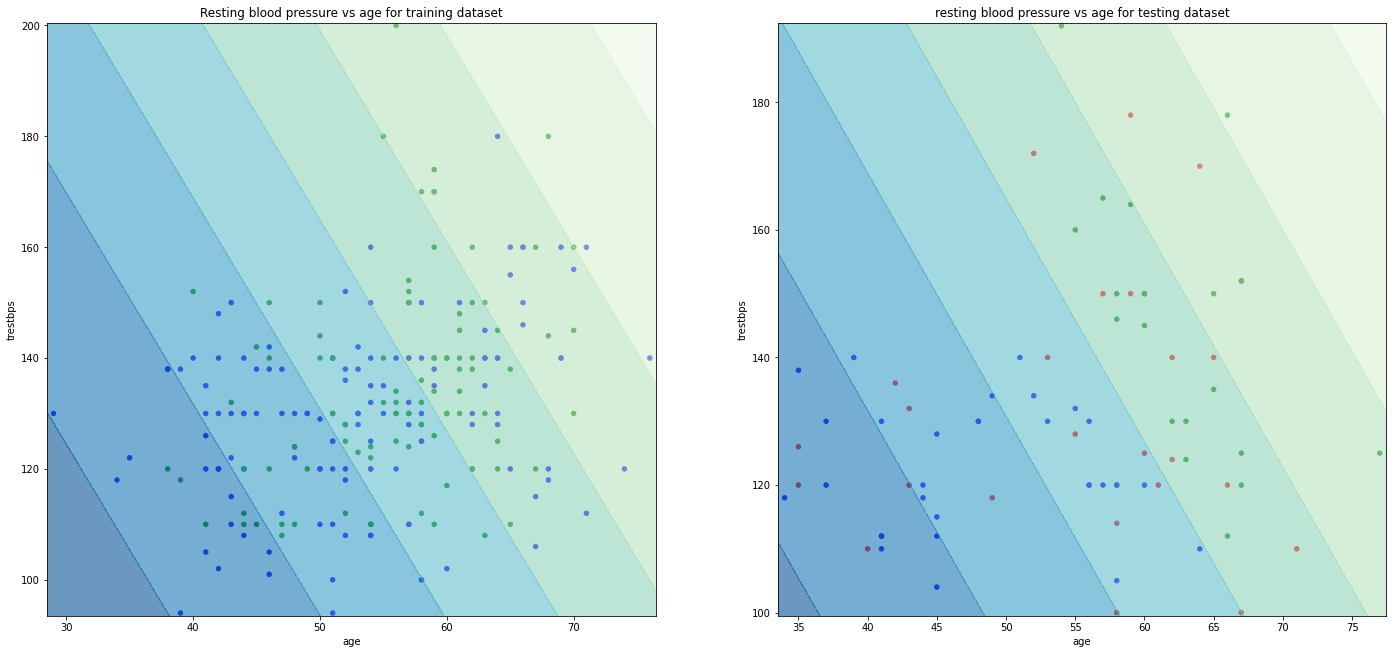

In [6]:
#Q3.d) Creating two subplots using the age and resting blood pressure features from the data set

h = .02  # Resolution in colored mesh visualizations
cm = plt.cm.GnBu # green and blue colour

# Set plot axis limits
x_min, x_max = X_train['age'].min() - .5, X_train['age'].max() + .5
y_min, y_max = X_train['trestbps'].min() - .5, X_train['trestbps'].max() + .5

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
#Calculating the probbility of the function with give input
output_proba_training_data = model_Q3c.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1] 

plt.figure(figsize = (24,24))
plot_dim = (2,2) # For a 2x2 plot

# Replacing 1 and 0 to blue and green
y_train.loc[y_train['target'] == 1 , 'colour'] = 'blue'
y_train.loc[y_train['target'] == 0 , 'colour'] = 'green'

#plotting the train data 
plt.subplot(plot_dim[0], plot_dim[1], 1)
#plot rest blood pressure vs age and using y_trains for colour 
plt.scatter(X_train['age'], X_train['trestbps'], s=20, c=y_train['colour'])
plt.xlabel("age")
plt.ylabel("trestbps")
plt.title("Resting blood pressure vs age for training dataset")

# Put the result into a color plot
output_proba_training_data = output_proba_training_data.reshape(xx.shape)
print(output_proba_training_data.shape)
plt.contourf(xx, yy, output_proba_training_data, cmap=cm, alpha=.6)


#Question 3.d ii) 

# Set plot axis limits
x_min_part2, x_max_part2 = X_test['age'].min() - .5, X_test['age'].max() + .5
y_min_part2, y_max_part2 = X_test['trestbps'].min() - .5, X_test['trestbps'].max() + .5

xx_part2, yy_part2 = np.meshgrid(np.arange(x_min_part2, x_max_part2, h), np.arange(y_min_part2, y_max_part2, h))
#Calculating the probbility of the function with give input
output_proba_training_data_part2 = model_Q3c.predict_proba(np.c_[xx_part2.ravel(), yy_part2.ravel()])[:, 1]

#Predicting values for y using X_test
y_test['predictions'] = model_Q3c.predict(X_test)

# Replacing 1 and 0 to blue and green
y_test.loc[y_test['target'] == 1 , 'colour'] = 'blue'
y_test.loc[y_test['target'] == 0 , 'colour'] = 'green'
# Replacing misclassificated data with red
y_test.loc[y_test['predictions'] != y_test['target'] , 'colour'] = 'red'

#plot test data
plt.subplot(plot_dim[0], plot_dim[1], 2)
plt.scatter(X_test['age'], X_test['trestbps'], s=20 ,c=y_test['colour'])
plt.xlabel("age")
plt.ylabel("trestbps")
plt.title("resting blood pressure vs age for testing dataset")

# Put the result into a color plot
output_proba_training_data_part2 = output_proba_training_data_part2.reshape(xx_part2.shape)
plt.contourf(xx_part2, yy_part2, output_proba_training_data_part2, cmap=cm, alpha=.6)

plt.show()

# Question 4

Linear regression. Download the file “Assig1Q3.csv” from GitHub under “Assignments/Assignment1”. The first column represents the X values, while the second column represents the Y values.
* Plot the data

We are going to use linear regression to fit a linear and a quadratic model to these data. Without using sklearn.linear_model (or any other linear regression libraries), write your own python code to implement the least squares solution for linear regression. That is:
$$\beta=(X^TX)^{−1}X^Ty$$

* Assuming the model $y=mx+b$, use your code to best-fit the parameters $m$ and $b$ to the data. Report your optimal parameter values. 
*Hints: 
    * recall that you must create the ‘augmented’ feature vector $X$ from the given $x$ data (add a column of 1’s). 
    * look at numpy.T(), numpy.matmul(), numpy.dot(), and numpy.linalg.inv()
* Plot your line of best fit on top of the data
* Calculate the sum of square residuals, or mean squared error, as in:
$$MSE(\beta) = \sum_{i=1}^{N}{(y−X\beta)^2}$$
* Assuming the model $y=ax^2+bx+c$, repeat steps 2-4 using this new model (i.e. estimate the optimal values for $a$,$b$,$c$; report those estimates; plot the line of best fit; report the MSE).
* Briefly discuss which model would you prefer for these data?
* Why is best-fitting the second (quadratic) model still considered linear regression?



## Step 1: Load the CSV file

Text(0.5, 1.0, 'plotting the x values')

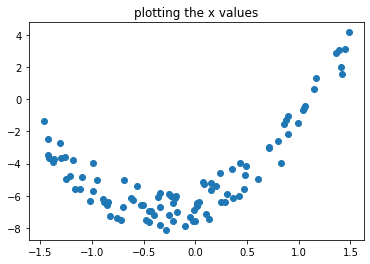

In [7]:
# Load libraries...
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('Assig1Q3.csv',header=None)
x_values = np.array(data[0]).reshape((100, 1))
y_values = np.array(data[1])

plt.scatter(x_values,y_values)
plt.title("plotting the x values")


## Step 2: Linear model $y=mx+b$

The bias value = -4.460975471665963
The weight value = 1.9098720420505146
MSE = 5.403948277421324


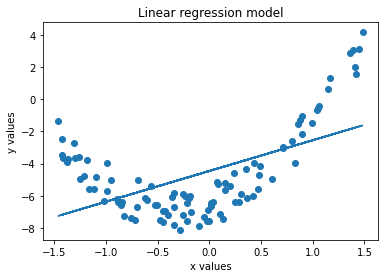

In [8]:
# Making a vector with a columns of ones
Xof1 = np.ones((len(x_values),1))
# Augment the x vector
augm_x = np.hstack((Xof1,x_values))

# Compute beta
beta = np.matmul(np.matmul(np.linalg.inv(np.matmul(augm_x.transpose(),augm_x)),augm_x.transpose()),y_values)
#The contain the optimized parameter i.e beta[0] is the y-intercept and beta[1] is the weight

bias = beta[0] # y-intercept
weight = beta[1] # slope (i.e m)

print(f"The bias value = {bias}")
print(f"The weight value = {weight}")

#y=mx + b
y_lin=weight * x_values + bias

#plotting the data with the optimized parameters
plt.scatter(x_values,y_values)
plt.title("Linear regression model")
plt.plot(x_values,y_lin)
plt.xlabel("x values")
plt.ylabel("y values")



# Compute the MSE mean squared aveage
MSE = np.sum((y_values - np.matmul(augm_x,beta))**2) / x_values.size

print(f"MSE = {MSE}")

## Step3: Quadratic model $y=ax^2+bx+c$

The bias value = -6.534142400783999
The weight value = 2.1672533520196366
The second weight value = 3.23704497990742
300
MSE =0.5683137448906699


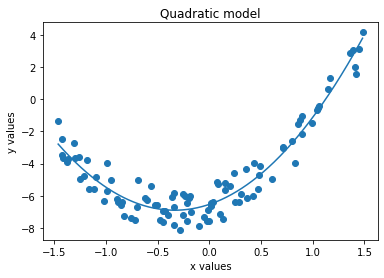

In [9]:
# Augment the x vector
qXof1 = np.ones((len(x_values),1))
#making 100 by 3 array like this [1,x,x^2]
qaugm_x = np.hstack((qXof1,x_values,x_values**2))

# Compute beta
qbeta = np.matmul(np.matmul(np.linalg.inv(np.matmul(qaugm_x.transpose(),qaugm_x)),qaugm_x.transpose()),y_values)

qbias = qbeta[0] # y-intercept
qweight = qbeta[1] # slope (i.e b)
qweight2 = qbeta[2] # slope (i.e a)

print(f"The bias value = {qbias}")
print(f"The weight value = {qweight}")
print(f"The second weight value = {qweight2}")

#y=ax^2+bx+c
#making matrix from lowest x_values and max_values with 1000 step in between
linx = np.linspace(x_values.min(),x_values.max(),1000)
qy_lin = qweight2 * linx**2 + qweight * linx +  qbias

#plotting the data with the optimized parameters
plt.scatter(x_values,y_values)
plt.title("Quadratic model")
plt.plot(linx,qy_lin)
plt.xlabel("x values")
plt.ylabel("y values")

print(qaugm_x.size)

# Compute the MSE
MSE = np.sum((y_values - np.matmul(qaugm_x,qbeta))**2) / x_values.size
print(f"MSE ={MSE}")

## Question 4 part 7

Briefly discuss which model would you prefer for these data?

<p>A quadratic model would be the prefered choose for this dataset. As you can see the data is in a parabola shape so it would make sense to use a use quadratic model. Futhermore if you compare the MSE of the linear and quadratic model you can see that quadratic model has less error.</p>


Why is best-fitting the second (quadratic) model still considered ​linear​ regression?

<p>The quadratic model is considered to be a linear regression algorithm becuase the beta coefficients (a, b, and c) are linear.</p>


# Question 5

- Create a Jupyter Notebook based on `Tutorial-3_ComparingMultipleClassifiers.ipynb` to use `make_classification` to create a linearly separable dataset, with 2 classes, 2 informative features, 1500 samples per class, using a class_sep=1.7, and a random_state of 5. 
- Generate some random noise of the same shape as your feature data, drawn from a standard normal distribution (see `numpy.random`) and a random_state of 5. 
- Create four datasets: 
    1. no noise, 
    2. data + 0.5 * noise, 
    3. data + 1.0 * noise, 
    4. data + 2.0 * noise. 
- i) For all four datasets, plot the data, labelling each (sub)plot by the degree of noise added (i.e. 0, 0.5, 1.0, and 2.0)
- ii) For each dataset, create training and test data using a 70/30 train/test split (see train_test_split).
- iii) For each dataset, train and test an SVM classifier with a polynomial kernel with `degree=2`, and `C=1.0`. Report the test score for each. How does prediction accuracy change with noise level?
- iv) For a noise level of 0.5, train and test SVM classifiers using the following values for $C: \{0.001, 0.01, 0.1, 1, 10, 100\}$. 
   - Report the test accuracy for each. 
   - How does performance vary with $C$?
   - Briefly describe what the $C$ controls for sklearn.svc. *Hint: look at the documentation for `sklearn.svc` rather than the class notes here...*


In [10]:
# Load the required libraries...
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

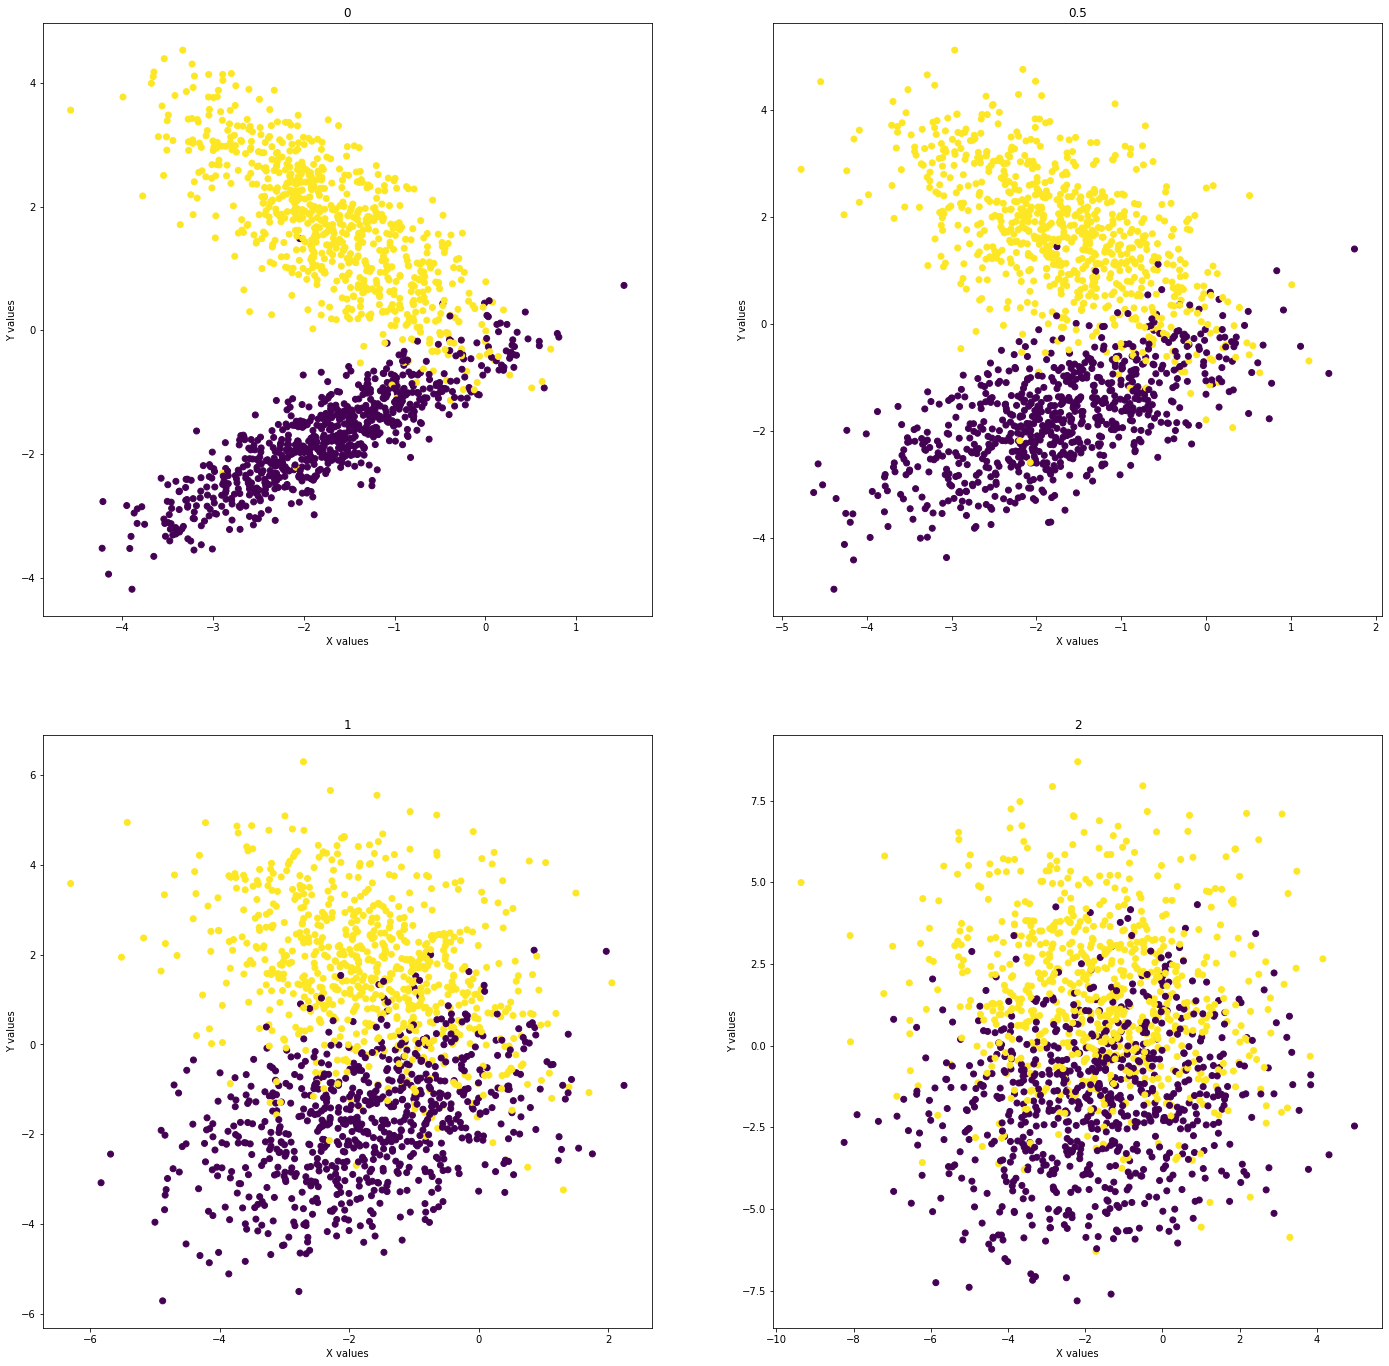

In [11]:
#Qestion 5 part a
X, y = make_classification(n_samples=1500, n_features=2, n_redundant=0, n_informative=2,
                           random_state=5, n_clusters_per_class=1, n_classes=2, class_sep=1.7)
#generating 1500 values of noise using the ​standard normal distribution​
noise = np.random.normal(size = (1500,2))

# putting x and y into tuple for plotting purpose
no_noise = (X,y)
noise_0_5 = (X + 0.5 * noise, y)
noise_1 = (X + 1 * noise, y)
noise_2 = (X + 2 * noise, y)

# The 3 datasets with noise and 1 without noise
noise_datasets = [no_noise, noise_0_5, noise_1, noise_2]
names = ["0", "0.5", "1", "2"]

plt.figure(figsize=(24,24))
plot_dim = (2,2) # For a 2x2 plot

for i in range(len(noise_datasets)):
  #Plot each dataset
  plt.subplot(plot_dim[0], plot_dim[1], i+1)
  plt.scatter(noise_datasets[i][0][0:,0], noise_datasets[i][0][0:,1], c=noise_datasets[i][1])
  plt.xlabel("X values")
  plt.ylabel("Y values")
  plt.title(names[i])

In [12]:
# Question 5 part b

#Split into test and train datasets for train and test for no noise   
X_train, X_test, y_train, y_test = train_test_split(no_noise[0],no_noise[1], test_size=0.30)

#Split into test and train datasets for train and test for no noise   
X_train_0_5, X_test_0_5, y_train_0_5, y_test_0_5 = train_test_split(noise_0_5[0],noise_0_5[1], test_size=0.30)

#Split into test and train datasets for train and test for no noise   
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(noise_1[0],noise_1[1], test_size=0.30)

#Split into test and train datasets for train and test for no noise   
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(noise_2[0],noise_2[1], test_size=0.30)


In [13]:
# Question 5 part c
svcmodel = SVC(kernel= 'poly', degree = 2, C=1.0)

# The model for no noise  
svcmodel.fit(X_train,y_train)
score_nonoise = svcmodel.score(X_test,y_test)

# The model for 0.5 noise 
svcmodel.fit(X_train_0_5,y_train_0_5)
score_noise_0_5 = svcmodel.score(X_test_0_5,y_test_0_5)

# The model for 1 noise  
svcmodel.fit(X_train_1,y_train_1)
score_noise_1 = svcmodel.score(X_test_1,y_test_1)

# The model for 2 noise  
svcmodel.fit(X_train_1,y_train_1)
score_noise_2 = svcmodel.score(X_test_2,y_test_2)

print(f'With no noise the value for accuracy was {score_nonoise}')
print(f'With a noise level of 0.5 the value for accuracy was {score_noise_0_5}')
print(f'With a noise level of 1 the value for accuracy was {score_noise_1}')
print(f'With a noise level of 2 the value for accuracy was {score_noise_2}')


With no noise the value for accuracy was 0.9377777777777778
With a noise level of 0.5 the value for accuracy was 0.9177777777777778
With a noise level of 1 the value for accuracy was 0.8155555555555556
With a noise level of 2 the value for accuracy was 0.64


# Question 5 part c
How does prediction accuracy change with noise level?
<p>
    The prediction accuracy decrease as the noise increase which mean that no noise will have a greatest accuracy and the model with noise level 2 would have the least.
</p>

In [14]:
#An array of C
arrofC = (0.001, 0.01, 0.1, 1, 10, 100)

for i in range(len(arrofC)):
    svcmodel_part2 = SVC(kernel= 'poly', degree = 2, C=arrofC[i])
    # The model for 0.5 noise 
    svcmodel_part2.fit(X_train_0_5,y_train_0_5)
    score_noise_0_5_part2 = svcmodel_part2.score(X_test_0_5,y_test_0_5)
    print(f'With a noise level of 0.5 and C level of {arrofC[i]} the value for accuracy was {score_noise_0_5_part2}')


With a noise level of 0.5 and C level of 0.001 the value for accuracy was 0.8466666666666667
With a noise level of 0.5 and C level of 0.01 the value for accuracy was 0.8955555555555555
With a noise level of 0.5 and C level of 0.1 the value for accuracy was 0.9177777777777778
With a noise level of 0.5 and C level of 1 the value for accuracy was 0.9177777777777778
With a noise level of 0.5 and C level of 10 the value for accuracy was 0.9244444444444444
With a noise level of 0.5 and C level of 100 the value for accuracy was 0.9244444444444444


#Question 5 part d

How does performance vary with C? 

   <p> The performance of the model doesn't vary too much with different of levels of c </p>

Briefly describe what the ​C​ controls for sklearn.svc.

   <p> C is the regularization parameter which control the strength of the regularization where it is inversely proportional to the value of C. Which mean as the C values decrease the strong the regularization where we are tradeoff bias for variance and allowing the model to more generalize  </p>


